## Einleitung


## Ziel der Arbeit

## Daten und Quellen

## Import, Bereinigung und Transformation

#### Verkehrsdaten

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Laden eines einzelnen Datensatz für eine erste Analyse der Daten

In [17]:
ordner_pfad = "/Users/remofankhauser/Verkehrsdaten_2024/2024-01-01_istdaten.csv"
df = pd.read_csv(ordner_pfad, sep=None, engine="python")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/remofankhauser/Verkehrsdaten_2024/2024-01-01_istdaten.csv'

Analyse der Spalten und Datentypen + Analysen der Verteilungen und möglichen Werten

In [ ]:
display(df.head())
display(df.info())

print(df["AB_PROGNOSE_STATUS"].value_counts())
print((df["ZUSATZFAHRT_TF"].value_counts() / len(df)).round(4))
print((df["FAELLT_AUS_TF"].value_counts() / len(df)).round(4))
print(df["DURCHFAHRT_TF"].value_counts() / len(df))
print(df["PRODUKT_ID"].value_counts())

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,01.01.2024,80:06____:17291:000,80:06____,DB,DB Regio AG Baden-Württemberg,Zug,17291,RB,NaN,RB,...,True,8500090,Basel Bad Bf,NaN,NaN,UNBEKANNT,01.01.2024 01:05,NaN,UNBEKANNT,False
1,01.01.2024,80:06____:70665:000,80:06____,DB,DB Regio AG Baden-Württemberg,Zug,70665,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 01:05,01.01.2024 01:06:00,PROGNOSE,False
2,01.01.2024,80:800631:17238:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17238,RB,NaN,RB,...,False,8500090,Basel Bad Bf,01.01.2024 07:05,01.01.2024 07:05:00,PROGNOSE,NaN,NaN,NaN,False
3,01.01.2024,80:800631:17239:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17239,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 07:53,01.01.2024 07:53:00,PROGNOSE,False
4,01.01.2024,80:800631:17241:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17241,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 08:53,01.01.2024 08:54:00,PROGNOSE,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501831 entries, 0 to 1501830
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   BETRIEBSTAG          1501831 non-null  object
 1   FAHRT_BEZEICHNER     1501831 non-null  object
 2   BETREIBER_ID         1501831 non-null  object
 3   BETREIBER_ABK        1501831 non-null  object
 4   BETREIBER_NAME       1501831 non-null  object
 5   PRODUKT_ID           1501831 non-null  object
 6   LINIEN_ID            1501831 non-null  object
 7   LINIEN_TEXT          1501831 non-null  object
 8   UMLAUF_ID            688303 non-null   object
 9   VERKEHRSMITTEL_TEXT  1501831 non-null  object
 10  ZUSATZFAHRT_TF       1501831 non-null  bool  
 11  FAELLT_AUS_TF        1501831 non-null  bool  
 12  BPUIC                1501831 non-null  int64 
 13  HALTESTELLEN_NAME    1389616 non-null  object
 14  ANKUNFTSZEIT         1413665 non-null  object
 15  AN_PROGNOSE    

None

AB_PROGNOSE_STATUS
REAL          1055968
PROGNOSE       335884
GESCHAETZT      12194
UNBEKANNT        9808
Name: count, dtype: int64
ZUSATZFAHRT_TF
False    0.9952
True     0.0048
Name: count, dtype: float64
FAELLT_AUS_TF
False    0.9924
True     0.0076
Name: count, dtype: float64
DURCHFAHRT_TF
False    0.999997
True     0.000003
Name: count, dtype: float64
PRODUKT_ID
Bus            1095159
Tram            165110
Zug             144955
BUS              90401
Metro             2934
Zahnradbahn       2111
WM-BUS             972
Schiff             189
Name: count, dtype: int64


Filtern nach VBZ

In [ ]:

filter_vbz = df["BETREIBER_ABK"].astype(str).str.contains("VBZ", na=False)

df_filtered = df[filter_vbz]
display(df_filtered.head())

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
262646,01.01.2024,85:3849:30593-07002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8591218,"Zürich,Kalkbreite/Bhf.Wiedikon",NaN,NaN,NaN,01.01.2024 04:51,01.01.2024 04:52:03,REAL,False
262647,01.01.2024,85:3849:30593-07002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8591079,"Zürich, Bezirksgebäude",01.01.2024 04:52,01.01.2024 04:53:08,REAL,01.01.2024 04:52,01.01.2024 04:53:27,REAL,False
262648,01.01.2024,85:3849:30593-07002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8591381,"Zürich, Stauffacher",01.01.2024 04:53,01.01.2024 04:54:44,REAL,01.01.2024 04:54,01.01.2024 04:55:26,REAL,False
262649,01.01.2024,85:3849:30593-07002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8591369,"Zürich, Sihlstrasse",01.01.2024 04:55,01.01.2024 04:57:08,REAL,01.01.2024 04:55,01.01.2024 04:57:26,REAL,False
262650,01.01.2024,85:3849:30593-07002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8591299,"Zürich, Paradeplatz",01.01.2024 04:57,01.01.2024 04:58:50,REAL,01.01.2024 04:57,01.01.2024 04:59:19,REAL,False


Analyse der Werte

In [ ]:
print(df_filtered["AB_PROGNOSE_STATUS"].value_counts())
print((df_filtered["ZUSATZFAHRT_TF"].value_counts() / len(df_filtered)).round(4))
print((df_filtered["FAELLT_AUS_TF"].value_counts() / len(df_filtered)).round(4))
print(df_filtered["DURCHFAHRT_TF"].value_counts() / len(df_filtered))
print(df_filtered["PRODUKT_ID"].value_counts())

AB_PROGNOSE_STATUS
REAL          148627
PROGNOSE        1654
GESCHAETZT      1007
UNBEKANNT        313
Name: count, dtype: int64
ZUSATZFAHRT_TF
False    0.9876
True     0.0124
Name: count, dtype: float64
FAELLT_AUS_TF
False    0.9725
True     0.0275
Name: count, dtype: float64
DURCHFAHRT_TF
False    1.0
Name: count, dtype: float64
PRODUKT_ID
Bus     90362
Tram    69637
Name: count, dtype: int64


Die Daten der Schweizer Verkehrsbetreiber liegen auf Tagesbasis vor. Die Daten werden nacheinander geladen und abschliessend zu einem Dataframe kombiniert welcher die Daten des gesamten Jahr 2024 enthält. Folgende Schritte werden durchlofen

1. Entfernen von nicht benötigten Spalten
- BETRIEBSTAG
- FAHRT_BEZEICHNER
- BETREIBER_ID
- BETREIBER NAME
- LINIEN_ID
- UMLAUF_ID
- VERKEHRSMITTEL_TEXT
- BPUIC
- ANKUNFTSZEIT
- AN_PROGNOSE
- AN_PROGNOSE_STATUS

2. Filtern der Rohdaten
- Nur Daten der Zürcher Verkehrsbetriebe
- Der Status der Abfahrtszeit Prognose muss Real oder GESCHAETZT sein
- Nur Daten welche Trams betreffen

3. Analyse der restlichen Spalten
- Keine Zusatzfahrten
- Keine ausgefallenen Fahrten
- Keine Fahrten welche diese Station nicht bedient haben

4. Filtern der restlichen Daten

5. Entfernen weiterere Spalten

6. Datumformat anpassen

7. Dataframes kombinieren und als neue Datei abspeichern

In [ ]:
# ----------Individuell Anpassen-----------
ordner_pfad = "/Users/remofankhauser/Verkehrsdaten_2024" # Ordnerpfad mit den CSV-Dateien
# -----------------------------------------

csv_dateien = glob.glob(os.path.join(ordner_pfad, "*.csv")) # Alle CSV-Dateien im Ordner finden

df_list = [] # Liste zum Speichern der DataFrames


for datei in csv_dateien:
    df = pd.read_csv(datei, sep=None, engine="python")  # Alle CSV-Dateien einlesen

    # Nicht benötigte Spalten entfernen
    df = df.drop(columns=["BETRIEBSTAG", "FAHRT_BEZEICHNER", "BETREIBER_ID", 
                          "BETREIBER_NAME", "LINIEN_ID", "UMLAUF_ID", 
                          "VERKEHRSMITTEL_TEXT", "BPUIC", "ANKUNFTSZEIT",
                          "AN_PROGNOSE", "AN_PROGNOSE_STATUS"])
    

    # Filterbedingungen definieren
    filter_conditions = [
        df["BETREIBER_ABK"].astype(str).str.contains("VBZ", na=False),
        df["AB_PROGNOSE_STATUS"].astype(str).str.contains("REAL|GESCHAETZT", na=False),
        df["PRODUKT_ID"].astype(str).str.contains("Tram", na=False),
        df["ZUSATZFAHRT_TF"] == False,
        df["FAELLT_AUS_TF"] == False,
        df["DURCHFAHRT_TF"] == False
    ]

    df = df[all(filter_conditions)]

    # Kontrolle der Spalteninhalte
    # print(df["BETREIBER_ABK"].unique())
    # print(df["PRODUKT_ID"].unique())
    # print(df["ZUSATZFAHRT_TF"].unique())
    # print(df["FAELLT_AUS_TF"].unique())
    # print(df["DURCHFAHRT_TF"].unique())


    # Weitere Spalten entfernen
    df = df.drop(columns=["BETREIBER_ABK", "PRODUKT_ID", "ZUSATZFAHRT_TF","FAELLT_AUS_TF", "DURCHFAHRT_TF"])


    # Datums- und Zeitformat korrekt setzen
    df["ABFAHRTSZEIT"] = pd.to_datetime(df["ABFAHRTSZEIT"]+ ":00", dayfirst=True, format="%d.%m.%Y %H:%M:%S")
    df["AB_PROGNOSE"] = pd.to_datetime(df["AB_PROGNOSE"], dayfirst=True, format="%d.%m.%Y %H:%M:%S")


    df_list.append(df)


    if df_list: # prüfen ob df_list leer ist
    df_gesamt = pd.concat(df_list, ignore_index=True) # Alle DataFrames zusammenfügen
    
    df_gesamt = df_gesamt.sort_values(by="ABFAHRTSZEIT").reset_index(drop=True)  # Sortierung nach Abfahrtszeit und Index zurücksetzen

    speicherpfad = os.path.join(ordner_pfad, "Verkehrs_Daten_2024.csv") # Speicherpfad definieren
    df_gesamt.to_csv(speicherpfad, index=False) # DataFrame speichern

In [ ]:
Analyse gelöschte Spalten und filter statements

### Wetterdaten
#### Datenquelle
Die Wetterdaten wurden vom Datenportal IDAweb (https://gate.meteoswiss.ch/idaweb) von MeteoSchweiz bezogen. Das Portal bietet Universitäten, (Fach-)Hochschulen und Schulen die Möglichkeit, Bodenstationsdaten von MeteoSchweiz zu beziehen.
##### Wetterdatensatz 1
Zunächst wurde auf IDAweb nach einer Wetterstation gesucht, die zentral in der Stadt Zürich liegt und genügend unterschiedliche, relevante und aktuelle Wetterdaten zur Verfügung stellt. Leider ist die Plattform nicht sehr benutzerfreundlich und die Suche erwies sich als sehr aufwändig. Nach erfolgter Suche wurde die Wetterstation Zürich Kaserne (NABZUE) als geeignetste Wetterstation identifiziert. Wir haben die folgenden fünf Wetterparameter (Granularität=stündlich) für den Zeitraum vom 1.1.2022 bis zum 31.12.2024 heruntergeladen:

-Böenspitze (Sekundenböe); Stundenmaximum in km/h

-Globalstrahlung; Stundenmittel in W/m²

-Lufttemperatur; 2 m über Boden; Stundenmittel in °C 

-Niederschlag; Stundensumme in mm

-Windgeschwindigkeit skalar; Stundenmittel in km/h

Die Legende zum Wetterdatensatz kann in folgender Datei eingesehen werden: Legende_Wetterdatensatz1.txt

In [2]:
# 1.1 Wetterdatensatz 1 einlesen (Böenspitze_kmh, Globalstrahlung_Wm2, Temperatur_C, Niederschlag_mm, Windgeschwindigkeit_kmh)
url = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Wetterdaten/Wetterdatensatz1.csv"
df_wetter1= pd.read_csv(url, sep=";", encoding="utf-8")

# 1.2 Spaltennamen anpassen (gemäss der Legende)
parameter_mapping1 = {
    "fu3010h1": "Böenspitze_kmh",
    "gre000h0": "Globalstrahlung_Wm2",
    "tre200h0": "Temperatur_C",
    "rre150h0": "Niederschlag_mm",
    "fu3010h0": "Windgeschwindigkeit_kmh"
}

df_wetter1 = df_wetter1.rename(columns=parameter_mapping1)


# 1.3 'time' in Datumsformat umwandeln
df_wetter1['time'] = pd.to_datetime(df_wetter1['time'], format='%Y%m%d%H', errors='coerce')

# 1.4 Filtern nach dem Jahr 2024
df_wetter1 = df_wetter1[df_wetter1['time'].dt.year == 2024]

# 1.5 Ersten 10 Zeilen anzeigen
display(df_wetter1.head(10))

# 1.6 Anzahl der Einträge für das Jahr 2024
anzahl_2024 = len(df_wetter1)
print(f"Anzahl der Einträge für 2024: {anzahl_2024}")

,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh
17520,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4
17521,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9
17522,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4
17523,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4
17524,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5
17525,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6
17526,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4
17527,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9
17528,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9
17529,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1


Anzahl der Einträge für 2024: 8784


##### Wetterdatensatz 2
Im Wetterdatensatz 1 (Station Zürich Kaserne) sind leider keine Wetterdaten für Schnee, Hagel und Nebel vorhanden. Deshalb wurde nach einer anderen Wetterstation in Zürich gesucht, die diese Daten erfasst. Nach der Suche wurde die Wetterstation Zürich Kloten (KLO) als geeignetste Wetterstation identifiziert. Wir haben die folgenden vier Wetterparameter (Granularität=täglich) für den Zeitraum vom 1.1.2024 bis zum 31.12.2024 heruntergeladen:

-Neuschneehöhe; Tagessumme 6 UTC - 6 UTC Folgetag in cm

-Schneehöhe; Morgenmessung von 6 UTC in cm

-Tag mit Hagel; y/n

-Tag mit Nebel; y/n

Die Legende zum Wetterdatensatz kann in folgender Datei eingesehen werden: Legende_Wetterdatensatz2.txt


In [3]:
# 2.1 Wetterdatensatz 2 einlesen (Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel)
url2 = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Wetterdaten/Wetterdatensatz2.csv"
df_wetter2 = pd.read_csv(url2, sep=";", encoding="utf-8")

# 2.2 Spaltennamen anpassen (gemäss der Legende)
parameter_mapping2 = {
    "hns000d0": "Neuschneehöhe_cm",
    "hto000d0": "Schneehöhe_Morgenmessung_6_UTC_cm",
    "w3p002d0": "Tag_mit_Hagel",
    "w5p002d0": "Tag_mit_Nebel"
}

df_wetter2 = df_wetter2.rename(columns=parameter_mapping2)
df_wetter2 = df_wetter2.rename(columns={"stn": "stn2", "time": "time2"})

# 2.3 Konvertiere die 'time'-Spalte in df_wetter2 in das Datetime-Format
df_wetter2['time2'] = pd.to_datetime(df_wetter2['time2'], format='%Y%m%d', errors='coerce')

#  2.4 Ersten 10 Zeilen anzeigen
display(df_wetter2.head(10))

,stn2,time2,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel
0,KLO,2024-01-01,0,0,0,0
1,KLO,2024-01-02,0,0,0,0
2,KLO,2024-01-03,0,0,0,0
3,KLO,2024-01-04,0,0,0,0
4,KLO,2024-01-05,0,0,0,0
5,KLO,2024-01-06,0,0,0,0
6,KLO,2024-01-07,0,0,0,0
7,KLO,2024-01-08,0,0,0,0
8,KLO,2024-01-09,2,0,0,0
9,KLO,2024-01-10,0,2,0,0


##### Zusammenführen der beiden Wetterdatensätze

Der Wetterdatensatz 2 hat nur eine tägliche Granularität, daher müssen die Tageswerte auf 24 Stunden multipliziert werden. Ansonsten kann das Zusammenführen der Datensätze aufgrund der unterschiedlichen Tabellenformate nicht funktionieren. Anschlissend werden die beiden Datensätze zusammengeführt.

In [4]:
#Beide Wetter Datensätze mergen

# 3.1 Wiederhole die täglichen Werte von df_wetter2 für jede Stunde des Tages
df_wetter2_repeated = df_wetter2.loc[df_wetter2.index.repeat(24)].reset_index(drop=True)

# 3.2 Kombiniere die beiden DataFrames
df_wetter = pd.concat([df_wetter1.reset_index(drop=True), df_wetter2_repeated], axis=1)

# 3.3 Entferne die Spalten 'stn2' und 'time2' aus dem kombinierten DataFrame
df_wetter = df_wetter.drop(columns=['stn2', 'time2'])

# 3.4 Zeige die ersten 10 Zeilen des kombinierten DataFrames an
display(df_wetter.head(10))

,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel
0,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4,0,0,0,0
1,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9,0,0,0,0
2,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4,0,0,0,0
3,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4,0,0,0,0
4,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5,0,0,0,0
5,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6,0,0,0,0
6,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4,0,0,0,0
7,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9,0,0,0,0
8,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9,0,0,0,0
9,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1,0,0,0,0


##### Datenbereinigung & Formatierung

Die relevanten Spalten wurden in numerische Werte (Float) umgewandelt. Ungültige Werte (-) wurden als NaN markiert und anschliessend mit dem Durchschnitt der jeweiligen Spalte ersetzt. Abschliessend wurde die Anzahl verbleibender NaN-Werte ausgegeben, um sicherzustellen, dass keine Datenlücken mehr vorhanden sind.


In [12]:
# 4.1 Umwandlung der angegebenen Spalten in float
columns_to_convert = ["Böenspitze_kmh", "Globalstrahlung_Wm2", "Windgeschwindigkeit_kmh", "Neuschneehöhe_cm", "Schneehöhe_Morgenmessung_6_UTC_cm"]

# 4.2 Konvertierung der Spalten in Float, fehlerhafte Werte als NaN setzen
df_wetter[columns_to_convert] = df_wetter[columns_to_convert].astype(float)

# 4.3 Überprüfen, ob die Umwandlung geklappt hat
print(df_wetter.dtypes)

# 4.4 Ersetzen von "-" durch NaN
df_wetter.replace("-", np.nan, inplace=True)

# 4.5 Alle Zeilen mit NaN-Werten extrahieren
df_nan = df_wetter[df_wetter.isna().any(axis=1)]

# 4.6 Durchschnitt für jede Spalte berechnen und fehlende Werte durch den jeweiligen Durchschnitt ersetzen
df_wetter.fillna(df_wetter.mean(numeric_only=True), inplace=True)


# 4.7 Anzahl der NaN-Werte pro Spalte anzeigen
nan_summary = df_wetter.isna().sum()

# 4.8 Anzahl der NaN-Werte pro Spalte ausgeben
print("Anzahl der NaN-Werte pro Spalte:")
print(nan_summary)

stn                                          object
time                                 datetime64[ns]
Böenspitze_kmh                              float64
Globalstrahlung_Wm2                         float64
Temperatur_C                                float64
Niederschlag_mm                             float64
Windgeschwindigkeit_kmh                     float64
Neuschneehöhe_cm                            float64
Schneehöhe_Morgenmessung_6_UTC_cm           float64
Tag_mit_Hagel                                 int64
Tag_mit_Nebel                                 int64
dtype: object
Anzahl der NaN-Werte pro Spalte:
stn                                  0
time                                 0
Böenspitze_kmh                       0
Globalstrahlung_Wm2                  0
Temperatur_C                         0
Niederschlag_mm                      0
Windgeschwindigkeit_kmh              0
Neuschneehöhe_cm                     0
Schneehöhe_Morgenmessung_6_UTC_cm    0
Tag_mit_Hagel                 

##### Überprüfung der Wetterdaten

Zur Plausibilitätsprüfung der Wetterdaten wurde ein Plot erstellt, der die geglättete Temperatur über den Jahresverlauf darstellt. Die Visualisierung zeigt ein erwartbares Muster: höhere Temperaturen im Sommer und niedrigere Temperaturen im Winter. Dies bestätigt die Plausibilität der Daten.

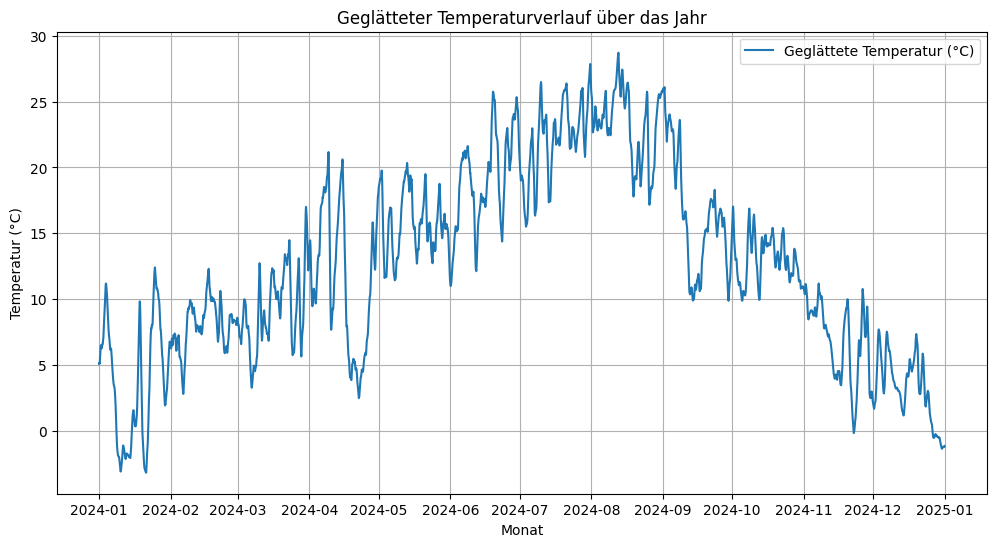

In [15]:
import matplotlib.dates as mdates
# 5.1 Gleitender Mittelwert (Moving Average) über 24 Stunden zur Glättung
df_wetter['Temperatur_Glatt'] = df_wetter['Temperatur_C'].rolling(window=24, min_periods=1).mean()

# 5.2 Liniendiagramm mit geglätteten Werten
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_wetter['time'], y=df_wetter['Temperatur_Glatt'], label='Geglättete Temperatur (°C)')

# 5.3 Achsentitel und Diagrammtitel setzen
plt.xlabel('Monat')
plt.ylabel('Temperatur (°C)')
plt.title('Geglätteter Temperaturverlauf über das Jahr')

# 5.4 X-Achse so formatieren, dass jeder Rasterpunkt einen Monat zeigt
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Jeden Monat einen Rasterpunkt setzen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format als "YYYY-MM"

# 5.5 Legende und Raster hinzufügen
plt.legend()
plt.grid()

# 5.6 Diagramm anzeigen
plt.show()

## Datenanalyse

## Präsentation der Ergebnisse